<a href="https://colab.research.google.com/github/ojasviyadav/HomeGymSpotterCNN/blob/master/mobilenetCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip Dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()
os.chdir('drive/My Drive/Colab Notebooks/pushupDetector')

In [ ]:
os.listdir()

['initialFrames.zip',
 'frames',
 'mobilenetv3-tensorflow',
 'labelledFrames.zip',
 'labelledFrames',
 'y.pickle',
 'X_test.pickle',
 'X_train.pickle',
 'X.pickle',
 'X_val.pickle',
 'y_train.pickle',
 'y_test.pickle',
 'y_val.pickle',
 'initalModel',
 'models',
 '.ipynb_checkpoints',
 'model2020-05-27 18:39:03.814617',
 'hetarthFrames',
 'hetarthFramesLabelled',
 'X2.pickle',
 'y2.pickle',
 'y2_val.pickle',
 'y2_test.pickle',
 'X2_val.pickle',
 'y2_train.pickle',
 'X2_train.pickle',
 'X2_test.pickle',
 'mobilenetCheck.ipynb']

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
!unzip labelledFrames.zip
# run once

Archive:  labelledFrames.zip
replace labelledFrames/down/1frame1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n,A
replace labelledFrames/down/1frame1001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# MobilenetV3 Training on MNIST





In [ ]:
!git clone https://github.com/ojasviyadav/mobilenetv3-tensorflow
# run once

Cloning into 'mobilenetv3-tensorflow'...
remote: Enumerating objects: 67, done.
remote: Total 67 (delta 0), reused 0 (delta 0), pack-reused 67
Unpacking objects: 100% (67/67), done.


In [ ]:
os.chdir('mobilenetv3-tensorflow')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 454.3MB 36kB/s 


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# used to initialize the GPU

Found GPU at: /device:GPU:0


In [ ]:
''' NOT USING THE CODE AS PROVIDED IN THE DOCS, BECAUSE IT USES TF1.0. TF2.0 will be better as it will let us use the gpu'''

In [ ]:
import tensorflow as tf

from mobilenetv3_factory import build_mobilenetv3
from datasets import build_dataset

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
from mobilenetv3_factory import build_mobilenetv3
model = build_mobilenetv3(
    "small",
    input_shape=(224, 224, 3),
    num_classes=1001,
    width_multiplier=1.0,
)

In [ ]:
# Parameters
name = "mnist"
train_batch_size = 128
valid_batch_size = 128
height = 64
width = 64
model_type = "small"
l2_reg = 0.0001
lr = 0.01
width_multiplier = 1.0
optimizer = tf.keras.optimizers.RMSprop(lr)
num_epoch = 5

In [ ]:
dataset = build_dataset(
        name=name,
        shape=[height,width],
        train_batch_size=train_batch_size,
        valid_batch_size=valid_batch_size
        )

In [ ]:
model = build_mobilenetv3(
        model_type,
        input_shape=(height, width, dataset["channels"]),
        num_classes=dataset["num_classes"],
        width_multiplier=width_multiplier,
        l2_reg=l2_reg,
    )

In [ ]:
model.compile(
        optimizer= optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"],)

In [ ]:
dataset

{'channels': 1,
 'num_classes': 10,
 'num_test': 10000,
 'num_train': 60000,
 'test': <DatasetV1Adapter shapes: ((None, 64, 64, 1), (None, 10)), types: (tf.float32, tf.float32)>,
 'train': <DatasetV1Adapter shapes: ((None, 64, 64, 1), (None, 10)), types: (tf.float32, tf.float32)>}

In [ ]:
model.fit(
        dataset["train"],
        steps_per_epoch=(dataset["num_train"]//train_batch_size)+1,
        epochs=num_epoch,
        validation_data=dataset["test"],
        validation_steps=(dataset["num_test"]//valid_batch_size)+1,
    )


Epoch 1/5
469/469 [==============================] - 30s 64ms/step - loss: 1.6821 - accuracy: 0.5939 - val_loss: 3.3674 - val_accuracy: 0.6535
Epoch 2/5
469/469 [==============================] - 29s 61ms/step - loss: 0.2658 - accuracy: 0.9516 - val_loss: 0.4806 - val_accuracy: 0.9185
Epoch 3/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1781 - accuracy: 0.9703 - val_loss: 0.5819 - val_accuracy: 0.8614
Epoch 4/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1594 - accuracy: 0.9742 - val_loss: 0.2047 - val_accuracy: 0.9615
Epoch 5/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1461 - accuracy: 0.9775 - val_loss: 0.1784 - val_accuracy: 0.9694


In [ ]:
!python3 evaluate.py \
    --model_type small \
    --width_multiplier 1.0 \
    --height 128 \
    --width 128 \
    --dataset mnist \
    --valid_batch_size 256 \
    --model_path mobilenetv3_small_mnist_10.h5

2020-05-12 19:10:51.553793: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-05-12 19:10:51.558486: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-05-12 19:10:51.558667: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b2ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-05-12 19:10:51.558699: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-05-12 19:10:51.560846: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-12 19:10:51.648445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-12 19:10:51.649129: I te

# MobilenetV2 Transfer Learning


In [ ]:
import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))
# used to initialize the GPU

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
print(raw_train)
print(raw_validation)
print(raw_test)

<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


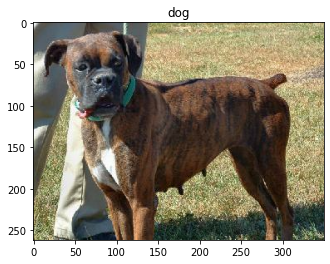

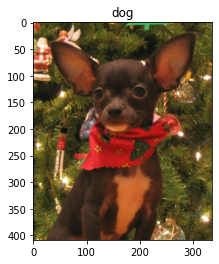

In [ ]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
print(raw_train)
p

<DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batch = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batch = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in validation_batches.take(1):
   pass

validation_batch.shape

AttributeError: ignored

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 13s 633ms/step - loss: 0.7404 - accuracy: 0.4953


In [ ]:
print((validation_batches))

<DatasetV1Adapter shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.74
initial accuracy: 0.50


In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
125/582 [=====>........................] - ETA: 5:19 - loss: 0.3259 - accuracy: 0.8593

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
len(model.trainable_variables)


58

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  10,
                         validation_data=validation_batches)

NameError: ignored

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

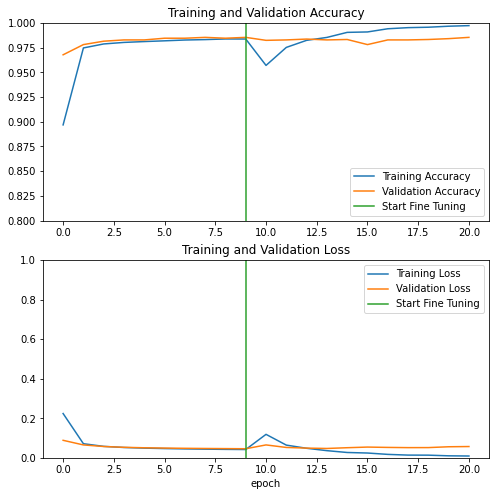

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#overfit lmaoo, but it's fine

# SERIALIZE THE DATASET

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/pushupDetector'

In [ ]:
DATADIR = ['labelledFrames']
CATEGORIES = ['down','else','up']

In [ ]:
IMG_SIZE = 100 # let's keep it explicitly this at this moment

In [ ]:
training_data = []

In [ ]:
def createTrainingData():
  for categories in CATEGORIES: #implement the loop starting from down, else and up
    path = os.path.join(DATADIR[0],categories)
    classNum = CATEGORIES.index(categories) # 0 = down , 1 = else, 2 = up
    for img in tqdm(os.listdir(path)):
      #print(tqdm(os.listdir(path))) # print all the files 
      try: #just in case any file ain't broken
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, classNum])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        print (e)
        pass

createTrainingData()

100%|██████████| 509/509 [00:04<00:00, 109.10it/s]


In [ ]:
print(len(training_data))

2432


In [ ]:
# USED TO RESHUFFLE THE DATA BECAAUSE WE NEED TO REMOVE BIAS FROM NN
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X = []
y = []

# MAKE X AND Y REPRESENTING FEATURES AND LABELS RESPECTIVELY
for features,label in training_data:
    X.append(features)
    y.append(label)

1
1
0
1
2
2
1
2
1
1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
'''X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2'''
#POTENTIAL BUG - TO BE CHECKED

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

# INITIALIZE TRANSFER LEARNING ON FIRST DATASET

### DATA PRE PROCESSING

In [ ]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)
pickle_in = open("X_val.pickle","rb")
X_val = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)
pickle_in = open("y_val.pickle","rb")
y_val = pickle.load(pickle_in)
y = np.array(y)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y = y.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

FileNotFoundError: ignored

In [ ]:
print(X[1].shape)
print(X_train[1].shape)
print(X_test[1].shape)
print(X_val[1].shape)
print(y[1].shape)
print(y_train[1].shape)
print(y_test[1].shape)
print(y_val[1].shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(1,)
(1,)
(1,)
(1,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


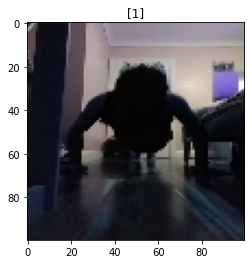

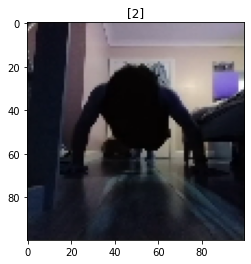

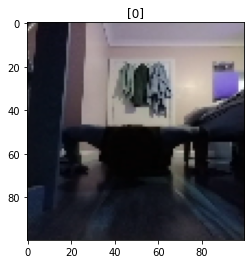

In [ ]:
#plt.imshow(X_train[10])
for index,i in enumerate(X_train[:3]):
  plt.figure()
  plt.imshow(i)
  plt.title(y_train[index])

In [ ]:
IMG_SIZE=100 #reshape the pic
# RESHAPE THE IMAGE ACCRODING TO YOUR GIVEN IMAGE SIZE
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# RESHAPE THE DATA ACCORDING TO THE FORMAT
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
#perfect

(2432, 100, 100, 3)
(1458, 100, 100, 3)
(487, 100, 100, 3)
(487, 100, 100, 3)
(2432, 1)
(1458, 1)
(487, 1)
(487, 1)


## ONE HOT ENCODING


In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# define example

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train[:3])


[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## TRANSFER LEARNING

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# used to initialize the GPU

#use only in final training

Found GPU at: /device:GPU:0


In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
validation_batch = base_model(X_val)
test_batch = base_model(X_test)
feature_batch = base_model(X_train)

In [ ]:
print(feature_batch.shape)
print(validation_batch.shape)
print(test_batch.shape)

(1458, 4, 4, 1280)
(487, 4, 4, 1280)
(487, 4, 4, 1280)


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [ ]:
#prediction_layer = tf.keras.layers.Dense(1) This is the old version, the following is the probablity based one hot encoding version

#shape of one hot encoded y_val/y_train/y_test, with sigmoid activation to make use of one hot encoding
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")


prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
Total params: 2,296,507
Trainable params: 38,523
Non-trainable params: 2,257,984
_________________________________________

In [ ]:
#len(model.trainable_variables)

In [ ]:
X_val = X_val.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
initial_epochs = 30
validation_steps=20

loss0,accuracy0 = model.evaluate(X_val, y_val, steps = validation_steps)

20/20 [==============================] - 2s 25ms/step - loss: 3.8745 - categorical_accuracy: 0.1663


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.87
initial accuracy: 0.17


In [ ]:
import datetime 
timeName=datetime.datetime.now()
checkpoint_path = "models/"+str(timeName)
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = model.fit(X_train, y_train,
          epochs=initial_epochs,
          validation_data=(X_val, y_val),
          callbacks=[cp_callback])  # Pass callback to training

# modified training code to save the model's weights

Epoch 1/30
46/46 [==============================] - 4s 32ms/step - loss: 1.1858 - categorical_accuracy: 0.5789 - val_loss: 0.6701 - val_categorical_accuracy: 0.6838

Epoch 00001: saving model to models/2021-06-15 18:00:47.905201
Epoch 2/30
46/46 [==============================] - 1s 21ms/step - loss: 0.7507 - categorical_accuracy: 0.6612 - val_loss: 0.6047 - val_categorical_accuracy: 0.6899

Epoch 00002: saving model to models/2021-06-15 18:00:47.905201
Epoch 3/30
46/46 [==============================] - 1s 23ms/step - loss: 0.6039 - categorical_accuracy: 0.6996 - val_loss: 0.4827 - val_categorical_accuracy: 0.7392

Epoch 00003: saving model to models/2021-06-15 18:00:47.905201
Epoch 4/30
46/46 [==============================] - 1s 21ms/step - loss: 0.5339 - categorical_accuracy: 0.7325 - val_loss: 0.4126 - val_categorical_accuracy: 0.8398

Epoch 00004: saving model to models/2021-06-15 18:00:47.905201
Epoch 5/30
46/46 [==============================] - 1s 23ms/step - loss: 0.4786 - ca

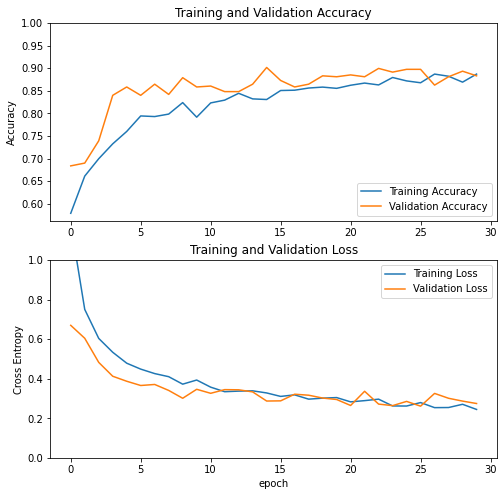

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[[7.5296545e-04 1.8947919e-01 8.0976784e-01]]
[0. 0. 1.]


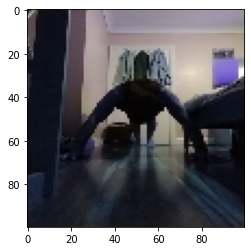

In [ ]:
imgID = 38
pp = model.predict(X_val[imgID].reshape(1,100,100,3))

print(pp)
plt.imshow(X_val[imgID].astype('int32'))
print(y_val[imgID])

In [ ]:
!ls {checkpoint_dir}

'2021-06-15 18:00:47.905201.data-00000-of-00001'   checkpoint
'2021-06-15 18:00:47.905201.index'


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")
prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

# RE INITIATE THE MODEL

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, steps = validation_steps, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

20/20 - 0s - loss: 2.8831 - categorical_accuracy: 0.5852
Untrained model, accuracy: 58.52%


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'models/2021-06-15 18:00:47.905201'

In [ ]:
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, steps = validation_steps, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

20/20 - 0s - loss: 0.2301 - categorical_accuracy: 0.9076
Restored model, accuracy: 90.76%


## Fine tuning


In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 149

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_15  (None, 1280)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 723,843
Non-trainable params: 1,537,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

8

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train, y_train,
                    initial_epoch=history.epoch[-1],
                    epochs=total_epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 10/20
46/46 [==============================] - 21s 457ms/step - loss: 0.0566 - categorical_accuracy: 0.9801 - val_loss: 1.2475 - val_categorical_accuracy: 0.5914
Epoch 11/20
46/46 [==============================] - 20s 435ms/step - loss: 0.0463 - categorical_accuracy: 0.9870 - val_loss: 1.6060 - val_categorical_accuracy: 0.5257
Epoch 12/20
46/46 [==============================] - 20s 435ms/step - loss: 0.0321 - categorical_accuracy: 0.9938 - val_loss: 2.1599 - val_categorical_accuracy: 0.4004
Epoch 13/20
46/46 [==============================] - 20s 435ms/step - loss: 0.0293 - categorical_accuracy: 0.9959 - val_loss: 2.2110 - val_categorical_accuracy: 0.4107
Epoch 14/20
46/46 [==============================] - 20s 435ms/step - loss: 0.0192 - categorical_accuracy: 0.9973 - val_loss: 4.1845 - val_categorical_accuracy: 0.2690
Epoch 15/20
46/46 [==============================] - 20s 434ms/step - loss: 0.0190 - categorical_accuracy: 0.9973 - val_loss: 3.1548 - val_categorical_accuracy:

In [ ]:
acc += history_fine.history['categorical_accuracy']
val_acc += history_fine.history['val_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

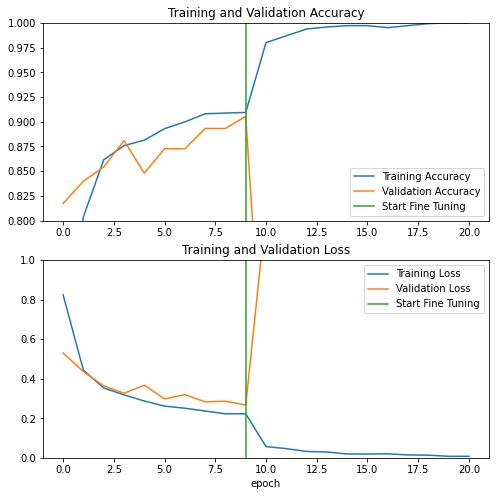

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# SERIALIZE THE SECOND DATASET

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/pushupDetector'

In [ ]:
DATADIR = ['hetarthFrames']
CATEGORIES = ['down','else','up']

In [ ]:
IMG_SIZE = 100 # let's keep it explicitly this at this moment

In [ ]:
training_data = []

In [ ]:
def createTrainingData():
  for categories in CATEGORIES: #implement the loop starting from down, else and up
    path = os.path.join(DATADIR[0],categories)
    classNum = CATEGORIES.index(categories) # 0 = down , 1 = else, 2 = up
    for img in tqdm(os.listdir(path)):
      #print(tqdm(os.listdir(path))) # print all the files 
      try: #just in case any file ain't broken
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, classNum])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        print (e)
        pass

createTrainingData()

100%|██████████| 44/44 [00:12<00:00,  3.41it/s]


In [ ]:
print(len(training_data))

298


In [ ]:
# USED TO RESHUFFLE THE DATA BECAAUSE WE NEED TO REMOVE BIAS FROM NN
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X2 = []
y2 = []

# MAKE X AND Y REPRESENTING FEATURES AND LABELS RESPECTIVELY
for features,label in training_data:
    X2.append(features)
    y2.append(label)

2
1
2
1
1
1
1
1
1
1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X2_train, X2_test, y2_train, y2_test  = train_test_split(X2, y2, test_size=0.2, random_state=1)

X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
import pickle
pickle_out = open("X2.pickle","wb")
pickle.dump(X2, pickle_out)
pickle_out.close()

pickle_out = open("X2_train.pickle","wb")
pickle.dump(X2_train, pickle_out)
pickle_out.close()

pickle_out = open("X2_test.pickle","wb")
pickle.dump(X2_test, pickle_out)
pickle_out.close()

pickle_out = open("X2_val.pickle","wb")
pickle.dump(X2_val, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y2, pickle_out)
pickle_out.close()

pickle_out = open("y2_train.pickle","wb")
pickle.dump(y2_train, pickle_out)
pickle_out.close()

pickle_out = open("y2_test.pickle","wb")
pickle.dump(y2_test, pickle_out)
pickle_out.close()

pickle_out = open("y2_val.pickle","wb")
pickle.dump(y2_val, pickle_out)
pickle_out.close()

# INITIALIZE TRANSFER LEARNING ON SECOND DATASET

### DATA PRE PROCESSING

In [ ]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
pickle_in = open("X2.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("X2_train.pickle","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("X2_test.pickle","rb")
X_test = pickle.load(pickle_in)
pickle_in = open("X2_val.pickle","rb")
X_val = pickle.load(pickle_in)
pickle_in = open("y2.pickle","rb")
y = pickle.load(pickle_in)
pickle_in = open("y2_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("y2_test.pickle","rb")
y_test = pickle.load(pickle_in)
pickle_in = open("y2_val.pickle","rb")
y_val = pickle.load(pickle_in)
y = np.array(y)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y = y.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [ ]:
print(X[1].shape)
print(X_train[1].shape)
print(X_test[1].shape)
print(X_val[1].shape)
print(y[1].shape)
print(y_train[1].shape)
print(y_test[1].shape)
print(y_val[1].shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(1,)
(1,)
(1,)
(1,)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


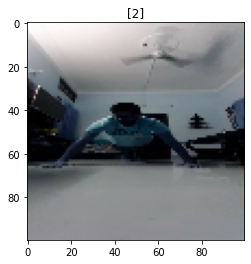

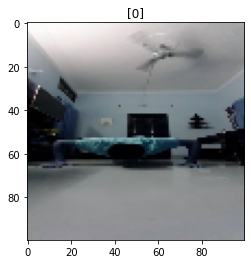

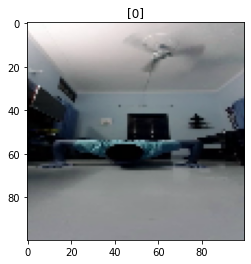

In [ ]:
#plt.imshow(X_train[10])
for index,i in enumerate(X_train[:3]):
  plt.figure()
  plt.imshow(i)
  plt.title(y_train[index])

In [ ]:
IMG_SIZE=100 #reshape the pic
# RESHAPE THE IMAGE ACCRODING TO YOUR GIVEN IMAGE SIZE
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# RESHAPE THE DATA ACCORDING TO THE FORMAT
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
#perfect

(298, 100, 100, 3)
(178, 100, 100, 3)
(60, 100, 100, 3)
(60, 100, 100, 3)
(298, 1)
(178, 1)
(60, 1)
(60, 1)


## ONE HOT ENCODING


In [ ]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train[:3])


Using TensorFlow backend.


[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


## TRANSFER LEARNING

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# used to initialize the GPU

#use only in final training

SystemError: ignored

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
validation_batch = base_model(X_val)
test_batch = base_model(X_test)
feature_batch = base_model(X_train)

In [ ]:
print(feature_batch.shape)
print(validation_batch.shape)
print(test_batch.shape)

(178, 4, 4, 1280)
(60, 4, 4, 1280)
(60, 4, 4, 1280)


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [ ]:
#prediction_layer = tf.keras.layers.Dense(1) This is the old version, the following is the probablity based one hot encoding version

#shape of one hot encoded y_val/y_train/y_test, with sigmoid activation to make use of one hot encoding
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")


prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
Total params: 2,296,507
Trainable params: 38,523
Non-trainable params: 2,257,984
_________________________________________

In [ ]:
#len(model.trainable_variables)

In [ ]:
X_val = X_val.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
initial_epochs = 30
validation_steps=20

loss0,accuracy0 = model.evaluate(X_val, y_val, steps = validation_steps)

20/20 [==============================] - 1s 66ms/step - loss: 2.1078 - categorical_accuracy: 0.0833


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.11
initial accuracy: 0.08


In [ ]:
import datetime 
timeName=datetime.datetime.now()
checkpoint_path = "models/"+str(timeName)
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = model.fit(X_train, y_train,
          epochs=initial_epochs,
          validation_data=(X_val, y_val),
          callbacks=[cp_callback])  # Pass callback to training

# modified training code to save the model's weights

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 2.1894 - categorical_accuracy: 0.4551
Epoch 00001: saving model to models/2020-07-04 19:44:24.211995
6/6 [==============================] - 3s 467ms/step - loss: 2.1894 - categorical_accuracy: 0.4551 - val_loss: 0.8011 - val_categorical_accuracy: 0.6167
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 1.4428 - categorical_accuracy: 0.3876
Epoch 00002: saving model to models/2020-07-04 19:44:24.211995
6/6 [==============================] - 2s 316ms/step - loss: 1.4428 - categorical_accuracy: 0.3876 - val_loss: 0.8992 - val_categorical_accuracy: 0.7000
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 1.0939 - categorical_accuracy: 0.5730
Epoch 00003: saving model to models/2020-07-04 19:44:24.211995
6/6 [==============================] - 2s 318ms/step - loss: 1.0939 - categorical_accuracy: 0.5730 - val_loss: 0.8814 - val_categorical_accuracy: 0.7333
Epoch 4/30
6/6 [========================

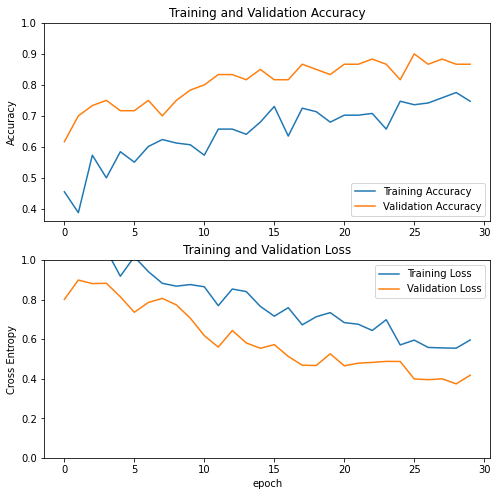

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[[0.03978113 0.85934657 0.10087231]]
[0. 1. 0.]


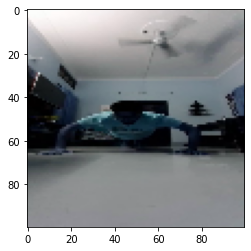

In [ ]:
imgID = 38
pp = model.predict(X_val[imgID].reshape(1,100,100,3))

print(pp)
plt.imshow(X_val[imgID].astype('int32'))
print(y_val[imgID])

In [ ]:
!ls {checkpoint_dir}

'2020-05-27 19:02:07.816303.data-00000-of-00002'
'2020-05-27 19:02:07.816303.data-00001-of-00002'
'2020-05-27 19:02:07.816303.index'
'2020-07-04 19:44:24.211995.data-00000-of-00001'
'2020-07-04 19:44:24.211995.index'
 checkpoint


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")
prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

# RE INITIATE THE MODEL

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X_val, y_val, steps = validation_steps, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

20/20 - 1s - loss: 3.0674 - categorical_accuracy: 0.2333
Untrained model, accuracy: 23.33%


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'models/2020-07-04 19:44:24.211995'

In [ ]:
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(X_val, y_val, steps = validation_steps, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

20/20 - 1s - loss: 0.4177 - categorical_accuracy: 0.8667
Restored model, accuracy: 86.67%


## Fine tuning


In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 149

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                38430     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total params: 2,296,507
Trainable params: 758,523
Non-trainable params: 1,537,984
______________________________________

In [ ]:
len(model.trainable_variables)

10

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train, y_train,
                    initial_epoch=history.epoch[-1],
                    epochs=total_epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 30/40
6/6 [==============================] - 3s 473ms/step - loss: 0.5680 - categorical_accuracy: 0.7809 - val_loss: 0.5739 - val_categorical_accuracy: 0.8333
Epoch 31/40
6/6 [==============================] - 2s 337ms/step - loss: 0.3280 - categorical_accuracy: 0.8539 - val_loss: 0.5248 - val_categorical_accuracy: 0.8667
Epoch 32/40
6/6 [==============================] - 2s 344ms/step - loss: 0.3594 - categorical_accuracy: 0.8483 - val_loss: 0.5074 - val_categorical_accuracy: 0.8833
Epoch 33/40
6/6 [==============================] - 2s 335ms/step - loss: 0.2799 - categorical_accuracy: 0.9045 - val_loss: 0.5959 - val_categorical_accuracy: 0.8667
Epoch 34/40
6/6 [==============================] - 2s 346ms/step - loss: 0.2666 - categorical_accuracy: 0.8820 - val_loss: 0.5437 - val_categorical_accuracy: 0.8833
Epoch 35/40
6/6 [==============================] - 2s 356ms/step - loss: 0.2275 - categorical_accuracy: 0.9045 - val_loss: 0.4760 - val_categorical_accuracy: 0.9000
Epoch 36/4

In [ ]:
acc += history_fine.history['categorical_accuracy']
val_acc += history_fine.history['val_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

TypeError: ignored

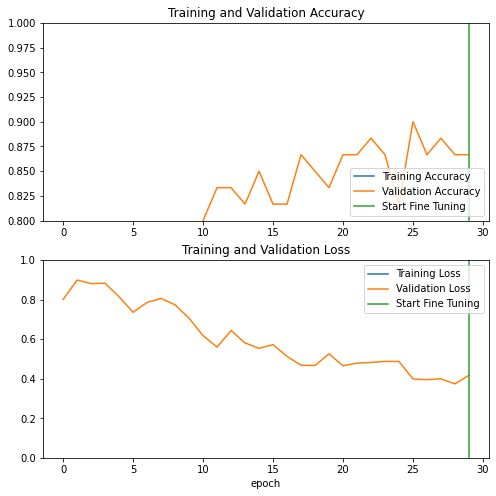

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# SERIALIZE THIRD DATASET (UNSKEWED hetarth)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/pushupDetector'

In [ ]:
DATADIR = ['hetarthFramesUnSkewed']
CATEGORIES = ['down','else','up']

In [ ]:
IMG_SIZE = 100 # let's keep it explicitly this at this moment

In [ ]:
training_data = []

In [ ]:
def createTrainingData():
  for categories in CATEGORIES: #implement the loop starting from down, else and up
    path = os.path.join(DATADIR[0],categories)
    classNum = CATEGORIES.index(categories) # 0 = down , 1 = else, 2 = up
    for img in tqdm(os.listdir(path)):
      #print(tqdm(os.listdir(path))) # print all the files 
      try: #just in case any file ain't broken
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, classNum])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        print (e)
        pass

createTrainingData()

100%|██████████| 45/45 [00:23<00:00,  1.89it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 45/45 [00:22<00:00,  2.00it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 44/44 [00:22<00:00,  1.99it/s]


In [ ]:
print(len(training_data))

132


In [ ]:
# USED TO RESHUFFLE THE DATA BECAAUSE WE NEED TO REMOVE BIAS FROM NN
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])
X3 = []
y3 = []

# MAKE X AND Y REPRESENTING FEATURES AND LABELS RESPECTIVELY
for features,label in training_data:
    X3.append(features)
    y3.append(label)

1
1
0
0
2
2
2
0
2
1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X3_train, X3_test, y3_train, y3_test  = train_test_split(X3, y3, test_size=0.2, random_state=1)

X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
import pickle
pickle_out = open("X3.pickle","wb")
pickle.dump(X3, pickle_out)
pickle_out.close()

pickle_out = open("X3_train.pickle","wb")
pickle.dump(X3_train, pickle_out)
pickle_out.close()

pickle_out = open("X3_test.pickle","wb")
pickle.dump(X3_test, pickle_out)
pickle_out.close()

pickle_out = open("X3_val.pickle","wb")
pickle.dump(X3_val, pickle_out)
pickle_out.close()

pickle_out = open("y3.pickle","wb")
pickle.dump(y3, pickle_out)
pickle_out.close()

pickle_out = open("y3_train.pickle","wb")
pickle.dump(y3_train, pickle_out)
pickle_out.close()

pickle_out = open("y3_test.pickle","wb")
pickle.dump(y3_test, pickle_out)
pickle_out.close()

pickle_out = open("y3_val.pickle","wb")
pickle.dump(y3_val, pickle_out)
pickle_out.close()

# INITIALIZE TRANSFER LEARNING ON THIRD DATASET (UNSKEWED hetarth)

### DATA PRE PROCESSING

In [ ]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
pickle_in = open("X3.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("X3_train.pickle","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("X3_test.pickle","rb")
X_test = pickle.load(pickle_in)
pickle_in = open("X3_val.pickle","rb")
X_val = pickle.load(pickle_in)
pickle_in = open("y3.pickle","rb")
y = pickle.load(pickle_in)
pickle_in = open("y3_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("y3_test.pickle","rb")
y_test = pickle.load(pickle_in)
pickle_in = open("y3_val.pickle","rb")
y_val = pickle.load(pickle_in)
y = np.array(y)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y = y.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [ ]:
print(X[1].shape)
print(X_train[1].shape)
print(X_test[1].shape)
print(X_val[1].shape)
print(y[1].shape)
print(y_train[1].shape)
print(y_test[1].shape)
print(y_val[1].shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(1,)
(1,)
(1,)
(1,)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


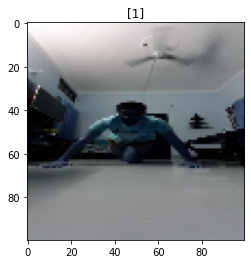

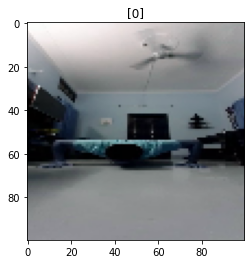

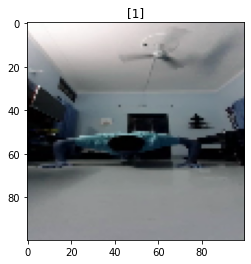

In [ ]:
#plt.imshow(X_train[10])
for index,i in enumerate(X_train[:3]):
  plt.figure()
  plt.imshow(i)
  plt.title(y_train[index])

In [ ]:
IMG_SIZE=100 #reshape the pic
# RESHAPE THE IMAGE ACCRODING TO YOUR GIVEN IMAGE SIZE
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# RESHAPE THE DATA ACCORDING TO THE FORMAT
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)
#perfect

(132, 100, 100, 3)
(78, 100, 100, 3)
(27, 100, 100, 3)
(27, 100, 100, 3)
(132, 1)
(78, 1)
(27, 1)
(27, 1)


## ONE HOT ENCODING


In [ ]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train[:3])


Using TensorFlow backend.


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## TRANSFER LEARNING

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
# used to initialize the GPU

#use only in final training

SystemError: ignored

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
validation_batch = base_model(X_val)
test_batch = base_model(X_test)
feature_batch = base_model(X_train)

In [ ]:
print(feature_batch.shape)
print(validation_batch.shape)
print(test_batch.shape)

(78, 4, 4, 1280)
(27, 4, 4, 1280)
(27, 4, 4, 1280)


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [ ]:
#prediction_layer = tf.keras.layers.Dense(1) This is the old version, the following is the probablity based one hot encoding version

#shape of one hot encoded y_val/y_train/y_test, with sigmoid activation to make use of one hot encoding
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")


prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d (Global (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
Total params: 2,296,507
Trainable params: 38,523
Non-trainable params: 2,257,984
_________________________________________

In [ ]:
#len(model.trainable_variables)

In [ ]:
X_val = X_val.astype('float32')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
initial_epochs = 30
validation_steps=20

loss0,accuracy0 = model.evaluate(X_val, y_val, steps = validation_steps)

14/20 [====================>.........] - 0s 30ms/step - loss: 1.2658 - categorical_accuracy: 0.4074


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.27
initial accuracy: 0.41


In [ ]:
import datetime 
timeName=datetime.datetime.now()
checkpoint_path = "models/"+str(timeName)
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = model.fit(X_train, y_train,
          epochs=initial_epochs,
          validation_data=(X_val, y_val),
          callbacks=[cp_callback])  # Pass callback to training

# modified training code to save the model's weights

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 2.2293 - categorical_accuracy: 0.3590
Epoch 00001: saving model to models/2020-07-11 08:43:27.156367
3/3 [==============================] - 1s 249ms/step - loss: 2.2293 - categorical_accuracy: 0.3590 - val_loss: 1.3950 - val_categorical_accuracy: 0.4444
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 1.7248 - categorical_accuracy: 0.4487
Epoch 00002: saving model to models/2020-07-11 08:43:27.156367
3/3 [==============================] - 1s 253ms/step - loss: 1.7248 - categorical_accuracy: 0.4487 - val_loss: 1.0399 - val_categorical_accuracy: 0.3704
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 1.4105 - categorical_accuracy: 0.4744
Epoch 00003: saving model to models/2020-07-11 08:43:27.156367
3/3 [==============================] - 1s 250ms/step - loss: 1.4105 - categorical_accuracy: 0.4744 - val_loss: 0.9997 - val_categorical_accuracy: 0.4074
Epoch 4/30
3/3 [========================

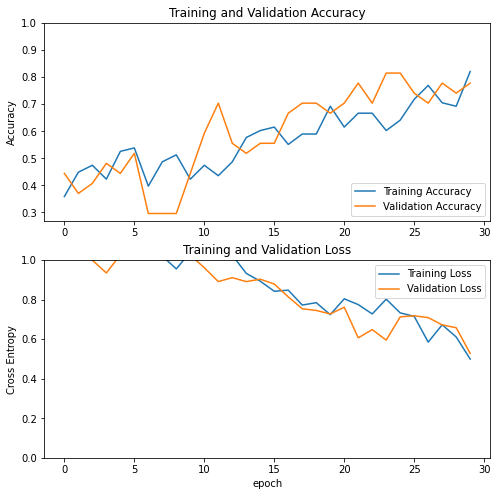

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[[0.70292854 0.26946002 0.02761145]]
[1. 0. 0.]


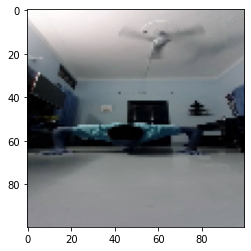

In [ ]:
imgID = 4
pp = model.predict(X_val[imgID].reshape(1,100,100,3))

print(pp)
plt.imshow(X_val[imgID].astype('int32'))
print(y_val[imgID])

In [ ]:
!ls {checkpoint_dir}

'2020-05-27 19:02:07.816303.data-00000-of-00002'
'2020-05-27 19:02:07.816303.data-00001-of-00002'
'2020-05-27 19:02:07.816303.index'
'2020-07-04 19:44:24.211995.data-00000-of-00001'
'2020-07-04 19:44:24.211995.index'
'2020-07-11 08:43:27.156367.data-00000-of-00001'
'2020-07-11 08:43:27.156367.index'
 checkpoint


In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")
prediction_layer = tf.keras.layers.Dense(y_val.shape[1], activation = "softmax")
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

# RE INITIATE THE MODEL

In [ ]:
# Evaluate the model
loss, acc = model.evaluate(X_val, y_val, steps = validation_steps, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

14/20 - 0s - loss: 1.9572 - categorical_accuracy: 0.4074
Untrained model, accuracy: 40.74%


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'models/2020-07-11 08:43:27.156367'

In [ ]:
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(X_val, y_val, steps = validation_steps, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

14/20 - 0s - loss: 0.5279 - categorical_accuracy: 0.7778
Restored model, accuracy: 77.78%


## Fine tuning


In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 149

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                38430     
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total params: 2,296,507
Trainable params: 758,523
Non-trainable params: 1,537,984
______________________________________

In [ ]:
len(model.trainable_variables)

10

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train, y_train,
                    initial_epoch=history.epoch[-1],
                    epochs=total_epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 30/40
3/3 [==============================] - 1s 466ms/step - loss: 0.5329 - categorical_accuracy: 0.8077 - val_loss: 0.6069 - val_categorical_accuracy: 0.7037
Epoch 31/40
3/3 [==============================] - 1s 230ms/step - loss: 0.3706 - categorical_accuracy: 0.8590 - val_loss: 0.6460 - val_categorical_accuracy: 0.6667
Epoch 32/40
3/3 [==============================] - 1s 230ms/step - loss: 0.3160 - categorical_accuracy: 0.8974 - val_loss: 0.6047 - val_categorical_accuracy: 0.7037
Epoch 33/40
3/3 [==============================] - 1s 232ms/step - loss: 0.2923 - categorical_accuracy: 0.8974 - val_loss: 0.5947 - val_categorical_accuracy: 0.7407
Epoch 34/40
3/3 [==============================] - 1s 229ms/step - loss: 0.1648 - categorical_accuracy: 0.9487 - val_loss: 0.5751 - val_categorical_accuracy: 0.8148
Epoch 35/40
3/3 [==============================] - 1s 227ms/step - loss: 0.2477 - categorical_accuracy: 0.8974 - val_loss: 0.5903 - val_categorical_accuracy: 0.7778
Epoch 36/4

In [ ]:
acc += history_fine.history['categorical_accuracy']
val_acc += history_fine.history['val_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

TypeError: ignored

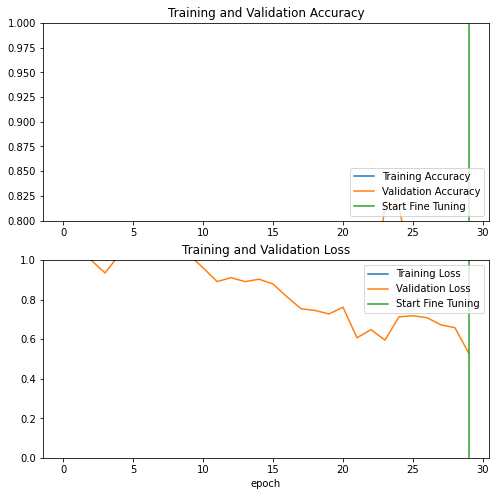

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()